## 实验：神经网络梯度（Gradient）

### 实验概要

#### 梯度的作用

在神经网络中，梯度的作用就是，在反向传播过程中，最佳的降低残差（Loss），更好的实现权重、偏置量参数的更新 **（w,b）**。

> 反向传播（英語：**Backpropagation**，缩写为 **BP**）是『误差反向传播』的简称，是一种与最优化方法（如梯度下降法）结合使用的，用来训练人工神经网络的常见方法。该方法对网络中所有权重计算损失函数的梯度。这个梯度会反馈给最优化方法，用来更新权值以最小化损失函数。—— 我们将在后面的章节中详细介绍。

#### 梯度下降假设场景

<img src="./img/0_bSErxcaiPqMiIXdu_08.jpg" width="50%">

首先，我们有一个可微分的函数。这个函数就代表着一座山。我们的目标就是找到这个函数的最小值，也就是山底。那么最快下山的方式就是找到当前位置最陡峭的方向，然后沿着此方向向下走，对应到函数中，就是找到给定点的梯度，然后朝着梯度相反的方向，就能让函数值下降的最快！通过反复利用这个方法，不断求梯度，最后达到据部最小值。这就类似于我们下山的过程。而求取梯度就确定了最陡峭的方向，也就是场景中测量方向的手段。

<img src="./img/3_08.png" width="60%">

那么为什么梯度的方向就是最陡峭的方向呢？接下来，我们从微分开始讲起 ——

##### 微分

看待微分的意义，可以有不同的角度，最常用的两种是：

- 函数图像中，某点的切线的斜率
- 函数的变化率

以下为几个微分的例子：

$$
\begin{array}{l}
\frac{d\left(x^{2}\right)}{d x}=2 x \\
\frac{d\left(-2 y^{5}\right)}{d y}=-10 y^{4} \\
\frac{d(5-\theta)^{2}}{d \theta}=-2(5-\theta)
\end{array}
$$

上面的例子都是单变量的微分，当一个函数有多个变量的时候，就有了多变量的微分，即分别对每个变量进行求微分：

$$
\begin{array}{l}
\frac{\partial}{\partial x}\left(x^{2} y^{2}\right)=2 x y^{2} \\
\frac{\partial}{\partial y}\left(-2 y^{5}+z^{2}\right)=-10 y^{4} \\
\frac{\partial}{\partial \theta_{2}}\left(5 \theta_{1}+2 \theta_{2}-12 \theta_{3}\right)=2 \\
\frac{\partial}{\partial \theta_{2}}\left(0.55-\left(5 \theta_{1}+2 \theta_{2}-12 \theta_{3}\right)\right)=-2
\end{array}
$$

##### 梯度

梯度实际上就是多变量微分的一般化。下面这个例子：

$$
\begin{aligned}
J(\Theta) &=0.55-\left(5 \theta_{1}+2 \theta_{2}-12 \theta_{3}\right) \\
\nabla J(\Theta) &=\left\langle\frac{\partial J}{\partial \theta_{1}}, \frac{\partial J}{\partial \theta_{2}}, \frac{\partial J}{\partial \theta_{3}}\right\rangle \\
&=\langle-5,-2,12\rangle
\end{aligned}
$$

我们可以看到，梯度就是分别对每个变量进行微分，然后用逗号分割开，梯度是用<>包括起来，说明梯度其实一个向量。

梯度是微积分中一个很重要的概念，之前提到过梯度的意义

- 在单变量的函数中，梯度其实就是函数的微分，代表着函数在某个给定点的切线的斜率
- 在多变量函数中，梯度是一个向量，向量有方向，梯度的方向就指出了函数在给定点的上升最快的方向

这也就说明了为什么我们需要千方百计的求取梯度！我们需要到达山底，就需要在每一步观测到此时最陡峭的地方，梯度就恰巧告诉了我们这个方向。梯度的方向是函数在给定点上升最快的方向，那么梯度的反方向就是函数在给定点下降最快的方向，这正是我们所需要的。所以我们只要沿着梯度的方向一直走，就能走到局部的最低点！

#### 梯度下降法的数学解释

梯度下降法的最重要公式如下：
$$\theta^1=\theta^0-\alpha\nabla J(\theta)$$

<img src="./img/2_08.png" width="50%">

此公式的意义是：**J** 是关于 $\theta$ 的一个函数，我们当前所处的位置为 $\theta$**0** 点，要从这个点走到 **J** 的最小值点，也就是山底。首先我们先确定前进的方向，也就是梯度的反向，然后走一段距离的步长，也就是 $\alpha$，走完这个段步长，就到达了 $\theta$**1** 这个点！$\alpha$ 在梯度下降算法中被称作为学习率 (**Learning Rate**) 或者步长，意味着我们可以通过 $\alpha$ 来控制每一步走的距离，$\alpha$ 太小，下山太慢，$\alpha$ 太大，则可能错过局部最低点。

<img src="./img/4_08.png" width="70%">

### 实验目标

在本实验中，我们通过 Python 实现梯度下降法，另外我们将通过 mini-batch 梯度下降实现更为高效的线性回归模型收敛。

### 1. 定义数据点显示函数

在本实验中，我们通过训练一个函数，将红色（标签为 `1`）与蓝色数据点（标签为 `0`）区分开来。

In [1]:
# 导入matplotlib绘图库
import matplotlib.pyplot as plt 
# 导入numpy科学计算库
import numpy as np              
# 导入pandas数据处理库
import pandas as pd             
%matplotlib inline

# 定义数据点创建函数
def plot_points(X, y):
    
    # 标签为1的数据点设置为红色（red）
    admitted = X[np.argwhere(y==1)]
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], 
                s = 25, color = 'red', edgecolor = 'k')
    
    # 标签为1的数据点设置为蓝色（blue）
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], 
                s = 25, color = 'blue', edgecolor = 'k')

# 定义显示函数    
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

### 2. 创建和显示数据

导入本地数据，根据数据点创建函数，显示不同标签数据样本的颜色。

In [2]:
import os
base_path = os.environ.get("BATH_PATH",'./data/')
data_path = os.path.join(base_path + "lab8/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 导入本地数据
data = pd.read_csv(data_path+'data.csv', header=None) 
# 显示数据前五行
data.head()                                         

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


从上表可知，其中第一第二列（[0, 1]）为数据列，第三列（[2]）为标签列。绘制数据分布散点图，数据列分别为 X,Y 轴，标签列使用颜色区分：

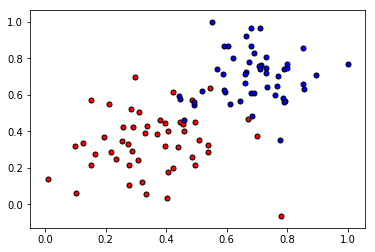

In [3]:
X = np.array(data[[0,1]])
y = np.array(data[2])

# 引用数据点创建函数
plot_points(X,y)
plt.show()

### 3. 基本函数实现

定义以下激活函数 ——

- Sigmoid 激活函数

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- 输出

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- 误差函数

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- 权重更新

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [4]:
# 激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 输出函数
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# 误差函数
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# 权重更新
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

### 4. 批量梯度下降

定义训练函数 `train()` 该训练函数将帮助我们通过所有数据来迭代梯度下降算法，用于多个 Epoch。它还将绘制数据，以及在我们运行算法时绘制出一些边界线。这种方式称为 **批量梯度下降**：在计算相对于整个训练集的误差梯度之后，更新参数，进入下一个 Epoch。由于在沿梯度方向迈出一步之前要考虑整个训练数据，因此进行单个更新会花费大量时间。而起好处在于可以平滑更新模型参数。


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669508
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.4593334641861401
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469987
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3973461571671399
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94


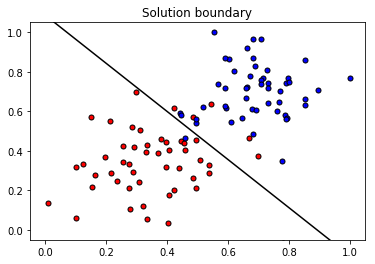

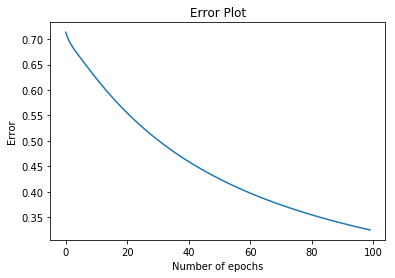

In [5]:
np.random.seed(44)

# 定义训练批次为100次
epochs = 100     
# 定义学习率为0.01
learnrate = 0.01 

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        # 在训练集上输出对数损失误差
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        
        # 每训练10个批次显示一次统计
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
  
    # 绘制分类边界
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # 绘制数据
    plot_points(features, targets)
    plt.show()

    # 绘制误差
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()
    
train(X, y, epochs, learnrate)

### 5. mini-batch 梯度下降

机器学习使用训练数据进行学习。使用训练数据进行学习，严格来说，就是针对训练数据计算损失函数的值，找出使该值尽可能小的参数。因此，计算损失函数时必须将所有的训练数据作为对象。也就是说，如果训练数据有 100 个的话，我们就要把这 100 个损失函数的总和作为学习的指标。

然而，譬如 MNIST 数据集的训练数据有 60000 个，如果以全部数据为对象求损失函数的和，则计算过程需要花费较长的时间。再者，如果遇到大数据，数据量会有几百万、几千万之多，这种情况下以全部数据为对象计算损失函数是不现实的。因此，我们从全部数据中选出一部分，作为全部数据的“近似”。神经网络的学习也是从训练数据中选出一批数据（称为 **mini-batch**，小批量），然后对每个 **mini-batch** 进行学习。比如，从 60000 个训练数据中随机选择 100 笔，再用这 100 笔数据进行学习。这种学习方式称为 **mini-batch 学习**。

另外，在上面的 **批次梯度下降** 中，我们可以看到每次梯度更新会花费大量的时间。**mini-batch** 梯度下降，则在计算相对于训练集的子集的误差梯度之后，更新参数。由于只考虑训练集的子集，因此它可以快速更新模型参数。因此，**mini-batch** 梯度下降在快速收敛和与梯度更新相关的噪声之间做出了折衷，这使其成为一种更加灵活和健壮的算法。

#### 5.1 生成测试数据

导入依赖库，生成用于线性回归的数据并可视化生成的数据。我们生成了 8000 个数据示例，每个示例都有 2 个特征。这些数据示例进一步分为分别具有 7200 和 800 个样本的训练集（X_train，y_train）和测试集（X_test，y_test）。

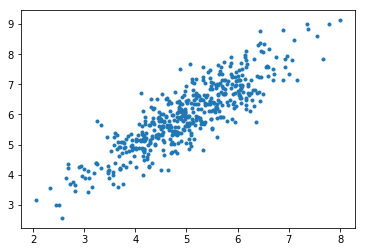

训练集样本数 =  7200
测试集样本数 =  800


In [6]:
# 导入依赖库
import numpy as np
import matplotlib.pyplot as plt
  
# 创建测试数据
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
# 从多元正态分布中抽取随机样本
data = np.random.multivariate_normal(mean, cov, 8000) 
  
# 可视化数据
plt.scatter(data[:500, 0], data[:500, 1], marker = '.')
plt.show()
  
# 分割训练集测试集
data = np.hstack((np.ones((data.shape[0], 1)), data))
  
split_factor = 0.90
split = int(split_factor * data.shape[0])
  
X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split:, :-1]
y_test = data[split:, -1].reshape((-1, 1))
  
print("训练集样本数 = % d"%(X_train.shape[0]))
print("测试集样本数 = % d"%(X_test.shape[0]))

#### 5.2 定义辅助函数

接下来，我们编写用于使用小批量梯度下降，实现线性回归的代码。其中，**`gradientDescent()`** 是主函数，其他函数是辅助函数 ——

- **`hypothesis()`：** 用于进行预测
- **`gradient()`：** 计算梯度
- **`cost()`：** 计算误差
- **`create_mini_batches()`：** 创建 Mini Batch

主函数将初始化参数，为模型计算最佳的参数集，然后将这些参数以及包含错误历史记录的列表返回，列表将随着参数的更新而更新。

In [7]:
# 使用“小批量”梯度下降的线性回归
# 计算假设/预测
def hypothesis(X, theta):
    return np.dot(X, theta)
  
# 计算误差函数的斜率w.r.t. theta
def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad
  
# 用于计算theta当前值的误差
def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]
  
# 创建包含Mini Batch的列表
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0 
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches
  
# 执行Mini Batch梯度下降
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    max_iters = 3
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
            error_list.append(cost(X_mini, y_mini, theta))
  
    return theta, error_list

调用 **`gradientDescent()`** 函数，计算模型参数 (theta)，并可视化误差函数的变化。

Bias =  [0.77435707]
Coefficients =  [[1.01651991]]


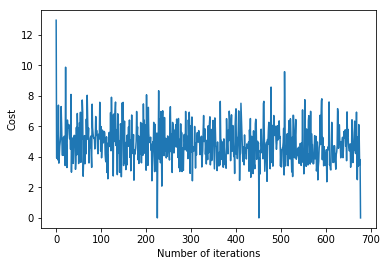

In [8]:
theta, error_list = gradientDescent(X_train, y_train)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])
  
# 可视化梯度下降
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

#### 5.3 计算预测 MAE

最后，我们在测试集上进行预测，并计算预测结果的平均绝对误差 MAE。

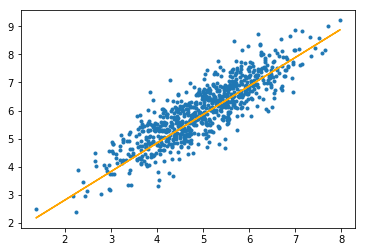

Mean absolute error =  0.4596452555774919


In [9]:
# 预测X_test的输出
y_pred = hypothesis(X_test, theta)
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.')
plt.plot(X_test[:, 1], y_pred, color = 'orange')
plt.show()
  
# 计算预测中的误差
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])
print("Mean absolute error = ", error)

### 实验小结

在本实验中，我们基本介绍完了梯度下降法的基本思想和算法流程，并且用 Python 实现了一个简单的梯度下降算法区分数据点的案例。最后，我们开头所提出的场景假设：这个下山的人实际上就代表了反向传播算法，下山的路径其实就代表着算法中一直在寻找的参数 $\theta$，山上当前点的最陡峭的方向实际上就是代价函数在这一点的梯度方向，场景中观测最陡峭方向所用的工具就是微分。在下一次观测之前的时间就是有我们算法中的学习率 $\alpha$ 所定义的。可以看到场景假设和梯度下降算法很好的完成了对应。最后，我们通过 mini-batch 梯度下降，实现了线性回归模型的收敛。